In [1]:
# Regularization: Ridge, LASSO, Elastic Net
# based on D. Bette that was based on J. Nagler
# for Wine database
# rebased by Jan Nagler in 2024 A.C.
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load database
wine = load_wine()

# Create data frame
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Construct train and test data sets
X = wine.data
y = wine.target

print(y)

# Split data into train and test datasets and use statify sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, #avoid imbalance in life
                                                    random_state=42) #42 is meaning of life

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
# Print dimensions of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [5]:
# Scale data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Define models

In [6]:
# Min: ||y - Xw||^2_2 + alpha * ||w||^2_2
def do_ridge(lambdaaa):
    ridge = Ridge(alpha=lambdaaa, max_iter=10e5 )
    ridge.fit(X_train,y_train)
    ridge_train_score=ridge.score(X_train,y_train)
    ridge_test_score=ridge.score(X_test,y_test)
    ridge_num_features = np.sum(ridge.coef_!=0)
    ridge_coef = ridge.coef_
    return [round(lambdaaa, 4), round(ridge_train_score, 4), round(ridge_test_score, 4), ridge_num_features], list(ridge_coef)

# Min: cN ||y - Xw||^2_2 + alpha * ||w||_1
def do_lasso(lambdaaa): #do not use "lambda" as variable
    lasso = Lasso( alpha=lambdaaa, max_iter=10e5 )
    lasso.fit( X_train,y_train )
    lasso_train_score=lasso.score( X_train,y_train )
    lasso_test_score=lasso.score( X_test,y_test )
    lasso_num_features = np.sum( lasso.coef_!=0 )
    lasso_coef = lasso.coef_
    return [round(lambdaaa, 4), round(lasso_train_score, 4), round(lasso_test_score, 4), lasso_num_features], list(lasso_coef)

# Min: cN ||y - Xw||^2_2 + c1 ||w||_1 + c2 ||w||^2_2
def do_elastic(lambdaaa):
    elast = ElasticNet(alpha=lambdaaa, l1_ratio=0.5, max_iter=10e5 ) # L1-Ratio is set to fixed value for comparison
    elast.fit(X_train,y_train)
    elast_train_score=elast.score(X_train,y_train)
    elast_test_score=elast.score(X_test,y_test)
    elast_num_features = np.sum(elast.coef_!=0)
    elast_coef = elast.coef_
    return [round(lambdaaa, 4), round(elast_train_score, 4), round(elast_test_score, 4), elast_num_features], list(elast_coef)

### Run LASSO

In [7]:
results, coefficient = [], []

for i in np.linspace(0.0001, 1, num=30):   
    run, coef_run = do_lasso(i)
    results.append(run)
    coefficient.append(coef_run)

temp_1 = pd.DataFrame(results, columns=["Lambda", "Train Score", "Test Score", "Number of features"])
temp_2 = pd.DataFrame(coefficient, columns=wine.feature_names)
lasso_results = pd.concat([temp_1, temp_2], axis=1)
lasso_results.head()

,Lambda,Train Score,Test Score,Number of features,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0001,0.9074,0.8557,13,-0.279295,0.215618,-0.07126,0.637522,-0.148156,0.498682,-1.735150,-0.225565,0.341024,0.764738,-0.079452,-0.544128,-0.925326
1,0.0346,0.7971,0.7693,3,-0.000000,0.000000,0.00000,0.000000,-0.000000,-0.000000,-1.384662,0.000000,-0.000000,0.000000,-0.000000,-0.447843,-0.523072
2,0.0691,0.6530,0.6360,2,-0.000000,0.000000,0.00000,0.000000,-0.000000,-0.000000,-1.468490,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.062868
3,0.1035,0.5163,0.5221,1,-0.000000,0.000000,0.00000,0.000000,-0.000000,-0.000000,-1.055990,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
4,0.1380,0.3368,0.3503,1,-0.000000,0.000000,-0.00000,0.000000,-0.000000,-0.000000,-0.615541,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000


### Run RIDGE

In [8]:
results, coefficient = [], []

for i in np.linspace(0.0001, 1, num=30):    
    run, coef_run = do_ridge(i)
    results.append(run)
    coefficient.append(coef_run)

temp_1 = pd.DataFrame(results, columns=["Lambda", "Train Score", "Test Score", "Number of features"])
temp_2 = pd.DataFrame(coefficient, columns=wine.feature_names)
ridge_results = pd.concat([temp_1, temp_2], axis=1)
ridge_results.head()

,Lambda,Train Score,Test Score,Number of features,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0001,0.9075,0.8552,13,-0.282383,0.219292,-0.078413,0.644169,-0.155535,0.512862,-1.746037,-0.231864,0.346796,0.769488,-0.075716,-0.547507,-0.922922
1,0.0346,0.9074,0.8581,13,-0.283109,0.213842,-0.084983,0.645954,-0.147266,0.476560,-1.699044,-0.218303,0.333064,0.755821,-0.097203,-0.552639,-0.916287
2,0.0691,0.9073,0.8606,13,-0.283807,0.209032,-0.090173,0.646732,-0.139858,0.443198,-1.656047,-0.205812,0.320386,0.742914,-0.116727,-0.557256,-0.910044
3,0.1035,0.9070,0.8628,13,-0.284470,0.204781,-0.094252,0.646705,-0.133189,0.412420,-1.616533,-0.194248,0.308617,0.730694,-0.134523,-0.561422,-0.904133
4,0.1380,0.9068,0.8646,13,-0.285096,0.201018,-0.097430,0.646032,-0.127159,0.383925,-1.580077,-0.183497,0.297638,0.719096,-0.150792,-0.565191,-0.898506


### Run ElasticNet

Note that L1-Ratio is set to 0.5 for comparison reasons: For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is an "elastic" combination of L1 and L2.

In [9]:
results, coefficient = [], []

for i in np.linspace(0.0001, 1, num=30):     
    run, coef_run = do_elastic(i)
    results.append(run)
    coefficient.append(coef_run)

temp_1 = pd.DataFrame(results, columns=["Lambda", "Train Score", "Test Score", "Number of features"])
temp_2 = pd.DataFrame(coefficient, columns=wine.feature_names)
elastic_results = pd.concat([temp_1, temp_2], axis=1)
elastic_results.head()

,Lambda,Train Score,Test Score,Number of features,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0001,0.9075,0.8560,13,-0.280978,0.216438,-0.076138,0.641260,-0.150316,0.499110,-1.731943,-0.226221,0.341384,0.764627,-0.081556,-0.546770,-0.922895
1,0.0346,0.8328,0.8258,7,-0.000000,0.010272,0.000000,0.238304,-0.000000,-0.000000,-1.031759,0.000000,-0.000000,0.003437,-0.262714,-0.642365,-0.641351
2,0.0691,0.7367,0.7491,6,-0.000000,0.000000,0.000000,0.035806,-0.000000,-0.005216,-0.897864,0.000000,-0.000000,0.000000,-0.093408,-0.542192,-0.473919
3,0.1035,0.6281,0.6512,4,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.003532,-0.758040,0.000000,-0.000000,0.000000,-0.000000,-0.434930,-0.326515
4,0.1380,0.5198,0.5469,3,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.623207,0.000000,-0.000000,0.000000,-0.000000,-0.327089,-0.204776


### Make plots

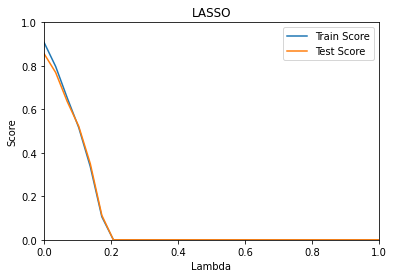

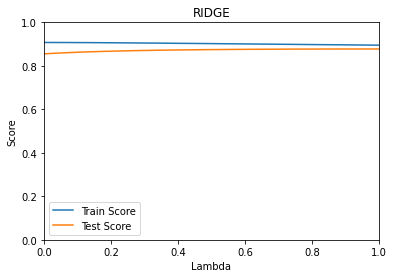

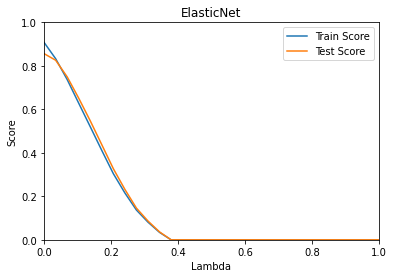

In [10]:
# Plot train vs test score

plot_names = ["LASSO", "RIDGE", "ElasticNet"]
plot_data = [lasso_results, ridge_results, elastic_results]

for name, data in zip(plot_names, plot_data):
    plt.plot(data["Lambda"], data["Train Score"], label="Train Score")
    plt.plot(data["Lambda"], data["Test Score"], label="Test Score")
    plt.xlabel("Lambda")
    plt.ylabel("Score")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend()
    plt.title(name)
    plt.show()

**Takeaway**: It seems like L2 regularization has much less effect on the score compared to the L1 regularization. This is probably due to the fact, that the coefficients of some variables are actually minimized to zero for the L1 regularization.

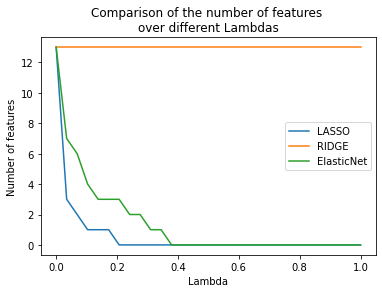

In [11]:
# Plot number of features

plot_names = ["LASSO", "RIDGE", "ElasticNet"]
plot_data = [lasso_results, ridge_results, elastic_results]

for name, data in zip(plot_names, plot_data):
    plt.plot(data["Lambda"], data["Number of features"], label=name)
    
plt.xlabel("Lambda")
plt.ylabel("Number of features")
plt.legend()
plt.title("Comparison of the number of features \nover different Lambdas")
plt.show()

**Takeaway**: As expected the number of features stays the same for the Ridge regularization, whereas the number of features drops to zero very fast for LASSO (at around Lambda = 0.2). For ElasticNet it takes a bit longer until all features are dropped, because L1 regularization is only considered to 50%.

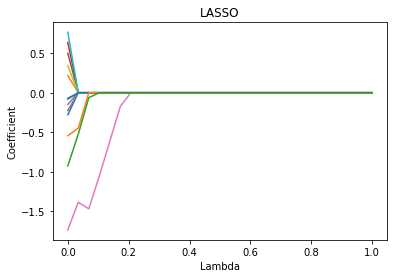

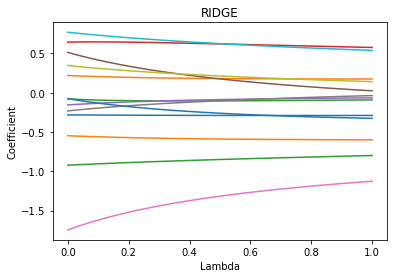

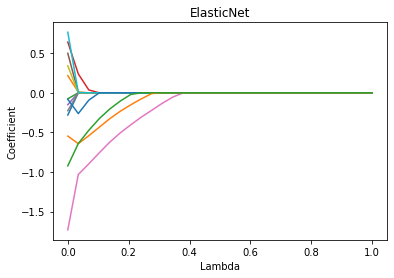

In [12]:
# Plot coefficients

plot_names = ["LASSO", "RIDGE", "ElasticNet"]
plot_data = [lasso_results, ridge_results, elastic_results]
coefficient_names = wine.feature_names

for name, data in zip(plot_names, plot_data):
    for column in coefficient_names:
        plt.plot(data["Lambda"], data[column], label="Train Score")
        plt.xlabel("Lambda")
        plt.ylabel("Coefficient")
        plt.title(name)
    plt.show()

**Takeaway**: The coefficients for the Ridge regression are quite stable over the increasing value of lambda, whereas for the LASSO and ElasticNet regularization, the coefficients go to zero. 

### ElasticNet Cross Validation

In [13]:
elastic_cv = ElasticNetCV(l1_ratio=np.linspace(0.001, 0.999, num=10), 
                          n_alphas=100,
                          cv=10, 
                          random_state=42)

elastic_cv.fit(X_train,y_train)
elastic_cv_train_score=round(elastic_cv.score(X_train,y_train), 4)
elastic_cv_test_score=round(elastic_cv.score(X_test,y_test), 4)
elastic_cv_num_features = np.sum(elastic_cv.coef_!=0)

In [14]:
print("Train Score: " + str(elastic_cv_train_score))
print("Test Score: " + str(elastic_cv_test_score))
print("L1 Ratio: " + str(round(elastic_cv.l1_ratio_, 1)))
print("Lambda: " + str(round(elastic_cv.alpha_, 4)))

Train Score: 0.9054
Test Score: 0.8686
L1 Ratio: 0.1
Lambda: 0.0021


**Takeaway**: The best model is found with an L1-Ratio of 10% and a relativly low regularization parameter of 0.0021.